# Library import

In [1]:
import numpy as np 
from itertools import permutations 
import pandas as pd 
import matplotlib.pyplot as plt

# Importing data (Time-Series)

In [2]:
data = pd.read_csv("data/out.txt")
px = data ['number'].to_numpy()

# Making the matrix

In [3]:
size = len(px)
dimension = 3 
tau = 1 
T = size - (dimension-tau)
x1=[px[i] for i in range(T)]
x2=[px[i+1] for i in range(T)]
x3=[px[i+2] for i in range(T)]
matriz = np.array([x1,x2,x3])


In [4]:
matriz

array([[ 4,  7,  9, 10,  6],
       [ 7,  9, 10,  6, 11],
       [ 9, 10,  6, 11,  3]])

# Program

In [5]:
print(list(permutations([0,1,2],3)))

[(0, 1, 2), (0, 2, 1), (1, 0, 2), (1, 2, 0), (2, 0, 1), (2, 1, 0)]


In [6]:
D =np.array([[0, 1, 2], [0, 2, 1], [1, 0, 2], [1, 2, 0], [2, 0, 1], [2, 1, 0]])
D = D.T
D

array([[0, 0, 1, 1, 2, 2],
       [1, 2, 0, 2, 0, 1],
       [2, 1, 2, 0, 1, 0]])

In [7]:
final_matrix = (dimension,T)
final_matrix = np.zeros(final_matrix)
final_matrix

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [8]:
for j in range(T):
    if matriz[0][j] < matriz[1][j] and matriz[0][j] < matriz[2][j]:
        if  matriz[1][j] <  matriz[2][j]:
            final_matrix[0][j] = 0 ;final_matrix[1][j] = 1 ;final_matrix[2][j] = 2 ;
        else:
             final_matrix[0][j] = 0 ;final_matrix[1][j] = 2 ;final_matrix[2][j] = 1 ;


    elif matriz[0][j] > matriz[1][j] and matriz[0][j] > matriz[2][j]:
        if  matriz[1][j] <  matriz[2][j]:
            final_matrix[0][j] = 2 ;final_matrix[1][j] = 0 ;final_matrix[2][j] = 1 ;
        else:
             final_matrix[0][j] = 2 ;final_matrix[1][j] = 1 ;final_matrix[2][j] = 0 ;



    else:
        if  matriz[1][j] <  matriz[2][j]:
            final_matrix[0][j] = 1 ;final_matrix[1][j] = 0 ;final_matrix[2][j] = 2 ;
        else:
             final_matrix[0][j] = 1;final_matrix[1][j] = 2 ;final_matrix[2][j] = 0 ;

In [9]:
p1 =0;p2=0;p3=0;p4=0;p5=0;p6=0;
for i in range(T):
    if final_matrix[0,i] == D[0,0] and final_matrix[1,i] == D[1,0] and final_matrix[2,i] == D[2,0]:
            p1 +=1
    elif final_matrix[0,i] == D[0,1] and final_matrix[1,i] == D[1,1] and final_matrix[2,i] == D[2,1]:
        p2 +=1
    elif final_matrix[0,i] == D[0,2] and final_matrix[1,i] == D[1,2] and final_matrix[2,i] == D[2,2]:
        p3 +=1
    elif final_matrix[0,i] == D[0,3] and final_matrix[1,i] == D[1,3] and final_matrix[2,i] == D[2,3]:
        p4 +=1

    elif final_matrix[0,i] == D[0,4] and final_matrix[1,i] == D[1,4] and final_matrix[2,i] == D[2,4]:
            p5 +=1
    else:
        p6+=1   

In [10]:
print("P1 = ", p1)
print("P2 = ", p2)
print("P3 = ", p3)
print("P4 = ", p4)
print("P5 = ", p5)
print("P6 = ", p6)

P1 =  2
P2 =  0
P3 =  1
P4 =  2
P5 =  0
P6 =  0


In [11]:
P =[p1/T,p2/T,p3/T,p4/T,p5/T,p6/T]

# Entropy of permutation

<h2> 

$PE_{d} = -\sum_{i=0}^{D!} p_{i} log_{2}p_{i}$ 

</h2>

In [12]:
pe=0
for i in range(len(P)):
    if P[i]== 0:
        continue
    pe += P[i]*np.log2(P[i])

In [13]:
pe = -1*pe
pe 

1.5219280948873621

# Entropy of permutation normalized

<h2> 

$PE_{d} = -\frac{1}{log_{2}D!} \sum_{i=0}^{D!} p_{i} log_{2}p_{i}$ 

</h2>

In [14]:
PeNormalized = (1/np.log2(np.math.factorial(dimension)))*pe

In [15]:
PeNormalized

0.5887621559162939

# Permutation Pattern

Text(17.1, 0.01, '$P_6$ = 0')

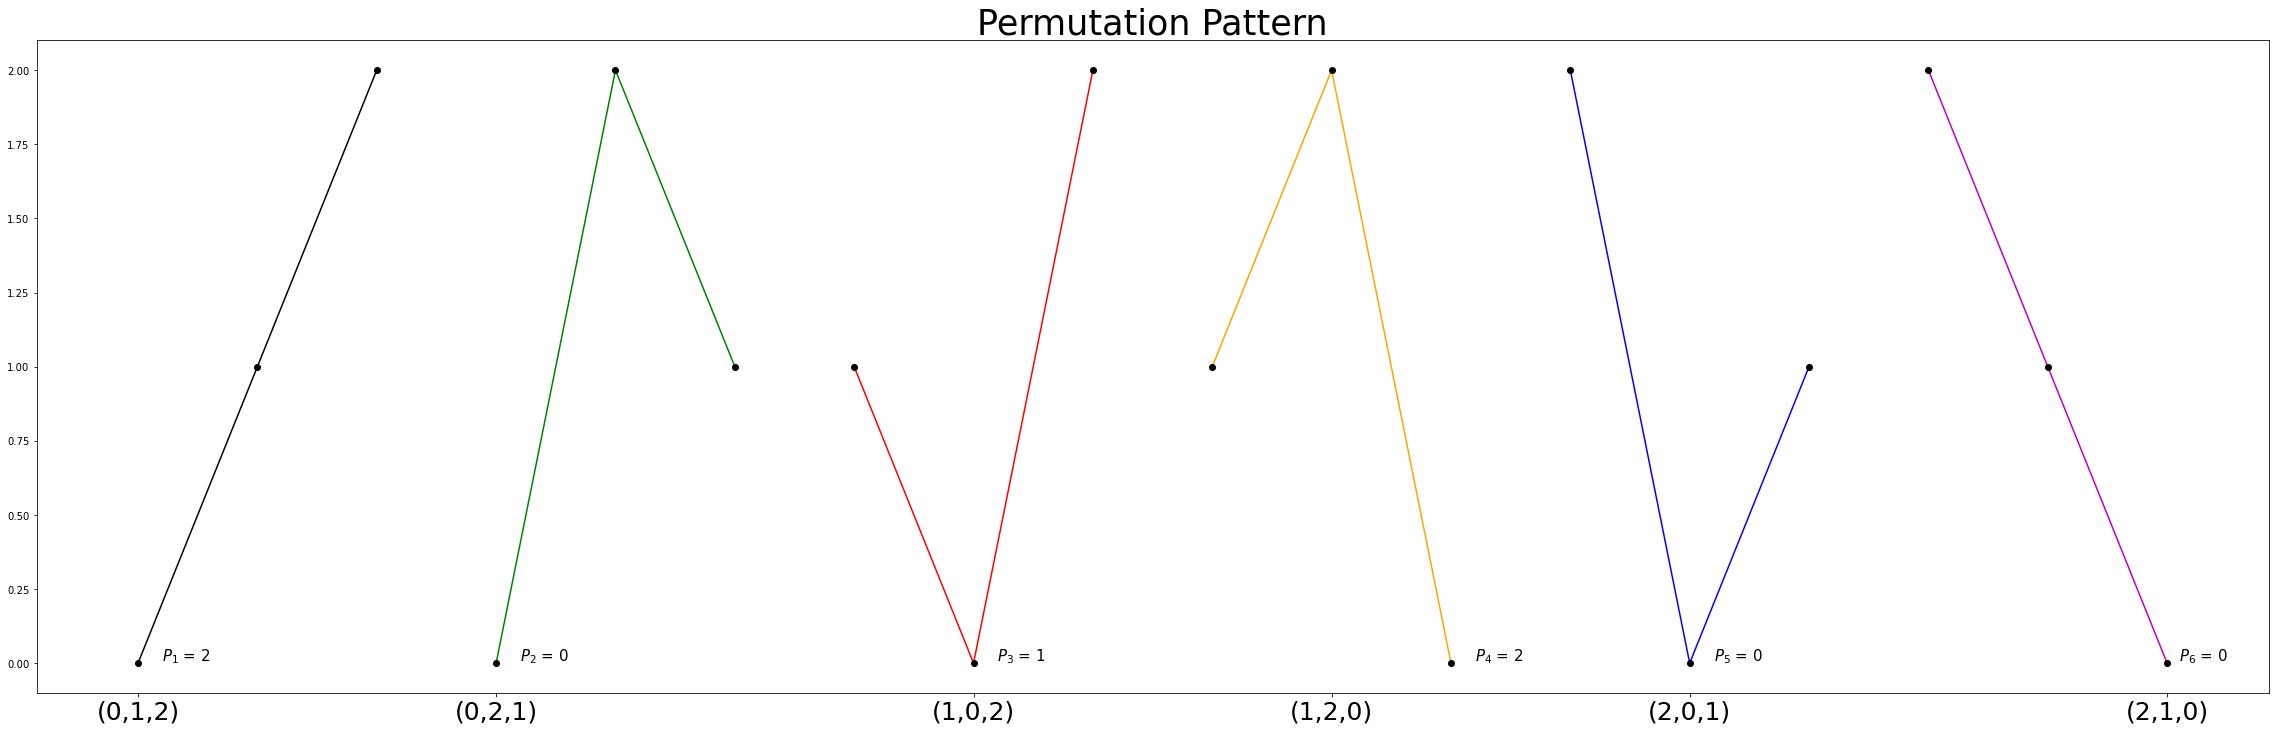

In [16]:
fig, ax = plt.subplots(figsize=(40,12))

ax = plt.gca()
valores_x = [0,3,7,10,13,17]
valores_x_label = ['(0,1,2)','(0,2,1)','(1,0,2)','(1,2,0)','(2,0,1)','(2,1,0)']
#ax.get_xaxis().set_visible(False)
plt.title("Permutation Pattern",fontsize=35)
plt.xticks(valores_x,valores_x_label,fontsize=25)


plt.plot([0,1,2],[0, 1, 2] ,'k',[0, 1, 2],'ko')
plt.plot([3,4,5],[0, 2, 1],'g',[3,4,5],[0, 2, 1],'ko')
plt.plot([6,7,8],[1, 0, 2],'r',[6,7,8],[1, 0, 2],'ko')
plt.plot([9,10,11],[1, 2, 0],'orange',[9,10,11],[1, 2, 0],'ko')
plt.plot([12,13,14],[2, 0, 1],'b',[12,13,14],[2, 0, 1],'ko')
plt.plot([15,16,17],[2, 1, 0],'m',[15,16,17],[2, 1, 0],'ko')
plt.text(0.2, .01, f'$P_{1}$ = {p1}',fontsize=15)
plt.text(3.2, .01, f'$P_{2}$ = {p2}',fontsize=15)
plt.text(7.2, .01, f'$P_{3}$ = {p3}',fontsize=15)
plt.text(11.2, .01, f'$P_{4}$ = {p4}',fontsize=15)
plt.text(13.2, .01, f'$P_{5}$ = {p5}',fontsize=15)
plt.text(17.1, .01, f'$P_{6}$ = {p6}',fontsize=15)
